# Issues reading SMAP with different xarray backends

This notebook explores [Issue 650](https://github.com/corteva/rioxarray/issues/650) for rioxarray.  The user finds that the y-axis is flipped when they use `xarray` with `rioxarray` to read SMAP L4 data but not when they use the `netcdf4` backend.

They use https://n5eil01u.ecs.nsidc.org/SMAP/SPL4SMGP.007/2015.03.31/SMAP_L4_SM_gph_20150331T013000_Vv7032_001.h5 as an example.

In [74]:
from pathlib import Path
import warnings

import xarray as xr
import rioxarray
import matplotlib.pyplot as plt

print(xr.__version__)
print(rioxarray.__version__)

2024.2.0
0.15.0


In [2]:
filepath = Path("smap_data/SMAP_L4_SM_gph_20150331T013000_Vv7032_001.h5")

In [3]:
engine = "netcdf4"
ds = xr.merge([
    xr.open_dataset(filepath, engine=engine),
    xr.open_dataset(filepath, group='Geophysical_Data', engine=engine)['precipitation_total_surface_flux'],
    ])
ds

<xarray.Dataset> Size: 175MB
Dimensions:                           (phony_dim_2: 1, y: 1624, x: 3856)
Coordinates:
  * x                                 (x) float64 31kB -1.736e+07 ... 1.736e+07
  * y                                 (y) float64 13kB 7.31e+06 ... -7.31e+06
Dimensions without coordinates: phony_dim_2
Data variables:
    EASE2_global_projection           (phony_dim_2) |S1 1B ...
    cell_column                       (y, x) float64 50MB ...
    cell_lat                          (y, x) float32 25MB ...
    cell_lon                          (y, x) float32 25MB ...
    cell_row                          (y, x) float64 50MB ...
    time                              (phony_dim_2) datetime64[ns] 8B ...
    precipitation_total_surface_flux  (y, x) float32 25MB ...
Attributes:
    Source:       v17.11.1
    Institution:  NASA Global Modeling and Assimilation Office
    History:      File written by ldas2daac.x
    Comment:      HDF-5
    Filename:     /discover/nobackup/projects/gmao/smap/SMAP_L4/L4_SM/Vv7032/...
    Title:        SMAP L4_SM Geophysical (GPH) Data Granule
    Conventions:  CF
    References:   see SMAP L4_SM Product Specification Documentation
    Contact:      http://gmao.gsfc.nasa.gov

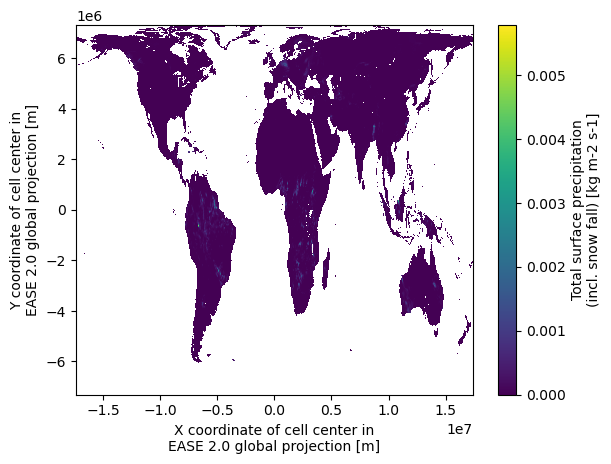

In [4]:
ds.precipitation_total_surface_flux.plot()

With `h5netcdf`

In [31]:
engine="h5netcdf"
ds = xr.merge([
    xr.open_dataset(filepath, engine=engine, phony_dims="sort"),
    xr.open_dataset(filepath, group='Geophysical_Data', engine=engine, phony_dims="sort")['precipitation_total_surface_flux'],
    ])
print(ds)

<xarray.Dataset> Size: 175MB
Dimensions:                           (phony_dim_2: 1, y: 1624, x: 3856)
Coordinates:
  * x                                 (x) float64 31kB -1.736e+07 ... 1.736e+07
  * y                                 (y) float64 13kB 7.31e+06 ... -7.31e+06
Dimensions without coordinates: phony_dim_2
Data variables:
    EASE2_global_projection           (phony_dim_2) |S1 1B ...
    cell_column                       (y, x) float64 50MB ...
    cell_lat                          (y, x) float32 25MB ...
    cell_lon                          (y, x) float32 25MB ...
    cell_row                          (y, x) float64 50MB ...
    time                              (phony_dim_2) datetime64[ns] 8B ...
    precipitation_total_surface_flux  (y, x) float32 25MB ...
Attributes:
    Comment:      HDF-5
    Contact:      http://gmao.gsfc.nasa.gov
    Conventions:  CF
    Filename:     /discover/nobackup/projects/gmao/smap/SMAP_L4/L4_SM/Vv7032/...
    History:      File written by ldas

In [38]:
%%capture  
# Avoid a string of NotGeoreferencedWarnings
# /home/apbarret/mambaforge/envs/nsidc-tutorials/lib/python3.9/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: 
#  Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
#  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
engine = "rasterio"
ds_rasterio = xr.open_dataset(filepath, engine=engine)

/home/apbarret/mambaforge/envs/nsidc-tutorials/lib/python3.9/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/home/apbarret/mambaforge/envs/nsidc-tutorials/lib/python3.9/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
/home/apbarret/mambaforge/envs/nsidc-tutorials/lib/python3.9/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/home/apbarret/mambaforge/envs/nsidc-tutorials/lib/python3.9/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotrans

In [41]:
print(ds_rasterio.x, ds_rasterio.y)

<xarray.DataArray 'x' (x: 3856)> Size: 31kB
array([5.0000e-01, 1.5000e+00, 2.5000e+00, ..., 3.8535e+03, 3.8545e+03,
       3.8555e+03])
Coordinates:
  * x                        (x) float64 31kB 0.5 1.5 ... 3.854e+03 3.856e+03
    EASE2_global_projection  int64 8B ... <xarray.DataArray 'y' (y: 1624)> Size: 13kB
array([5.0000e-01, 1.5000e+00, 2.5000e+00, ..., 1.6215e+03, 1.6225e+03,
       1.6235e+03])
Coordinates:
  * y                        (y) float64 13kB 0.5 1.5 ... 1.622e+03 1.624e+03
    EASE2_global_projection  int64 8B ...


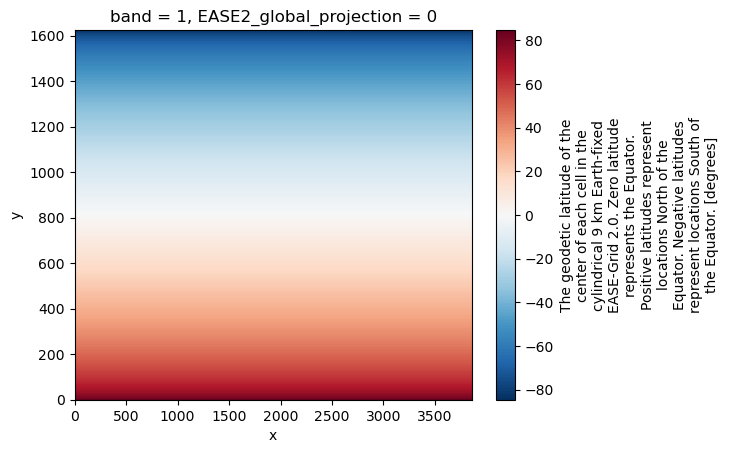

In [43]:
ds_rasterio.cell_lat.plot()
plt.savefig('smap_h5_cell_lat.png')

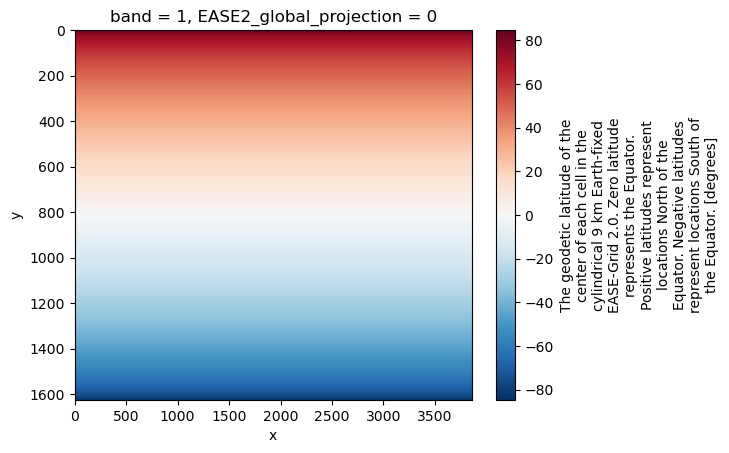

In [49]:
ds_rasterio.cell_lat.squeeze().plot.imshow(origin="upper")

In [19]:
!h5dump -d x {filepath}

HDF5 "smap_data/SMAP_L4_SM_gph_20150331T013000_Vv7032_001.h5" {
DATASET "x" {
   DATATYPE  H5T_IEEE_F64LE
   DATASPACE  SIMPLE { ( 3856 ) / ( 3856 ) }
   DATA {
   (0): -1.7363e+07, -1.7354e+07, -1.7345e+07, -1.7336e+07, -1.7327e+07,
   (5): -1.7318e+07, -1.7309e+07, -1.73e+07, -1.7291e+07, -1.7282e+07,
   (10): -1.72729e+07, -1.72639e+07, -1.72549e+07, -1.72459e+07,
   (14): -1.72369e+07, -1.72279e+07, -1.72189e+07, -1.72099e+07,
   (18): -1.72009e+07, -1.71919e+07, -1.71829e+07, -1.71739e+07,
   (22): -1.71649e+07, -1.71558e+07, -1.71468e+07, -1.71378e+07,
   (26): -1.71288e+07, -1.71198e+07, -1.71108e+07, -1.71018e+07,
   (30): -1.70928e+07, -1.70838e+07, -1.70748e+07, -1.70658e+07,
   (34): -1.70568e+07, -1.70477e+07, -1.70387e+07, -1.70297e+07,
   (38): -1.70207e+07, -1.70117e+07, -1.70027e+07, -1.69937e+07,
   (42): -1.69847e+07, -1.69757e+07, -1.69667e+07, -1.69577e+07,
   (46): -1.69487e+07, -1.69396e+07, -1.69306e+07, -1.69216e+07,
   (50): -1.69126e+07, -1.69036e+07, -1.68946

In [63]:
ds_rioxarray  = xr.merge([
    xr.open_dataset(filepath, decode_coords="all"),
    xr.open_dataset(filepath, group='Geophysical_Data', decode_coords="all")['precipitation_total_surface_flux'],
])

print(ds_rioxarray)

<xarray.Dataset> Size: 175MB
Dimensions:                           (phony_dim_2: 1, y: 1624, x: 3856)
Coordinates:
    EASE2_global_projection           (phony_dim_2) |S1 1B ...
  * x                                 (x) float64 31kB -1.736e+07 ... 1.736e+07
  * y                                 (y) float64 13kB 7.31e+06 ... -7.31e+06
Dimensions without coordinates: phony_dim_2
Data variables:
    cell_column                       (y, x) float64 50MB ...
    cell_lat                          (y, x) float32 25MB ...
    cell_lon                          (y, x) float32 25MB ...
    cell_row                          (y, x) float64 50MB ...
    time                              (phony_dim_2) datetime64[ns] 8B ...
    precipitation_total_surface_flux  (y, x) float32 25MB ...
Attributes:
    Source:       v17.11.1
    Institution:  NASA Global Modeling and Assimilation Office
    History:      File written by ldas2daac.x
    Comment:      HDF-5
    Filename:     /discover/nobackup/projects/gm

/tmp/ipykernel_230171/3642432009.py:3: UserWarning: Variable(s) referenced in grid_mapping not in variables: ['EASE2_global_projection']
  xr.open_dataset(filepath, group='Geophysical_Data', decode_coords="all")['precipitation_total_surface_flux'],


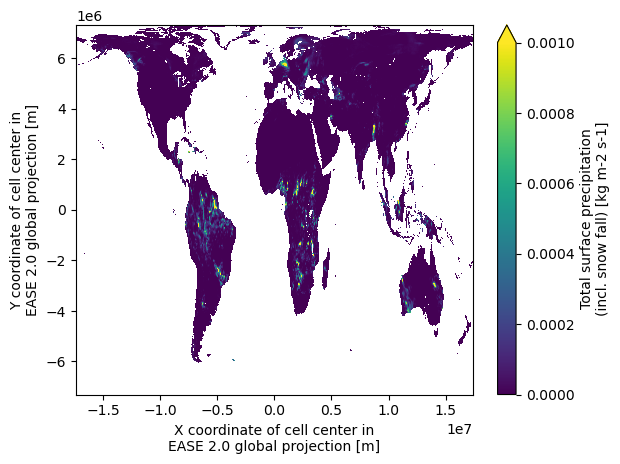

In [67]:
ds_rioxarray.precipitation_total_surface_flux.plot(vmax=0.001)
plt.savefig('smap_h5_precipitation.png')

In [68]:
ds_rioxarray.rio.crs

CRS.from_epsg(6933)

In [69]:
ds_rioxarray.rio.transform()

Affine(9008.0556640625, 0.0, -17367531.3203125,
       0.0, -9008.0556640625, 7314541.19921875)

In [71]:
ds_rioxarray.rio.reproject?

Signature:
ds_rioxarray.rio.reproject(
    dst_crs: Any,
    resolution: Union[float, tuple[float, float], NoneType] = None,
    shape: Optional[tuple[int, int]] = None,
    transform: Optional[affine.Affine] = None,
    resampling: rasterio.enums.Resampling = <Resampling.nearest: 0>,
    nodata: Optional[float] = None,
    **kwargs,
) -> xarray.core.dataset.Dataset
Docstring:
Reproject :class:`xarray.Dataset` objects

.. note:: Only 2D/3D arrays with dimensions 'x'/'y' are currently supported.
    Others are appended as is.
    Requires either a grid mapping variable with 'spatial_ref' or
    a 'crs' attribute to be set containing a valid CRS.
    If using a WKT (e.g. from spatiareference.org), make sure it is an OGC WKT.

.. note:: To re-project with dask, see
    `odc-geo <https://odc-geo.readthedocs.io/>`__ &
    `pyresample <https://pyresample.readthedocs.io/>`__.

.. versionadded:: 0.0.27 shape
.. versionadded:: 0.0.28 transform
.. versionadded:: 0.5.0 nodata, kwargs

Parameters


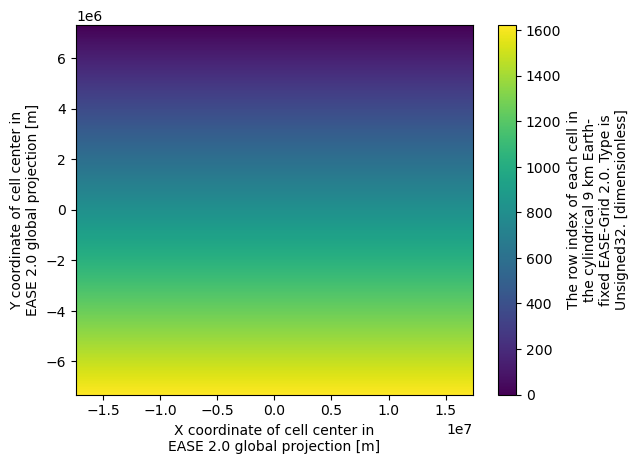

In [77]:
ds.cell_row.plot()

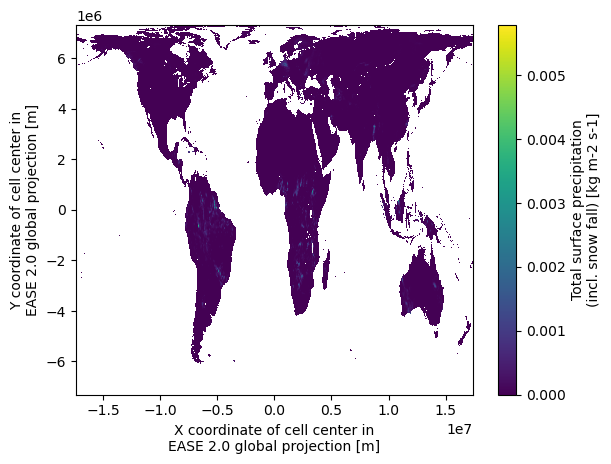

In [78]:
ds.precipitation_total_surface_flux.plot.imshow()

Try writing a dummy geotiff and then read it back in